In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [269]:
#reading the data
books = pd.read_csv('books_wrangled.csv')

In [327]:
ratings = pd.read_csv('ratings_wrangled.csv')

In [270]:
books.head(3)

,Unnamed: 0,Title,review/score_Avg,review/score_Count,description,authors,publisher,publishedDate,categories
0,Its Only Art If Its Well Hung!,Its Only Art If Its Well Hung!,4.000000,1.0,NaN,['Julie Strain'],NaN,1996,['Comics & Graphic Novels']
1,Dr. Seuss: American Icon,Dr. Seuss: American Icon,4.555556,9.0,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography']
2,Wonderful Worship in Smaller Churches,Wonderful Worship in Smaller Churches,5.000000,4.0,This resource includes twelve principles in un...,['David R. Ray'],NaN,2000,['Religion']


In [328]:
ratings.head(3)

,Unnamed: 0,Id,Title,User_id,review/helpfulness,review/score,review/summary,review/text
0,0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,7/7,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,10/10,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,10/11,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."


# Converting the publishedDate column to datetime with 4 digit year format

In [272]:
books['publishedDate'] = pd.to_datetime(books['publishedDate'], utc=True, errors='coerce').dt.year

In [273]:
books.head(3)

,Unnamed: 0,Title,review/score_Avg,review/score_Count,description,authors,publisher,publishedDate,categories
0,Its Only Art If Its Well Hung!,Its Only Art If Its Well Hung!,4.000000,1.0,NaN,['Julie Strain'],NaN,1996.0,['Comics & Graphic Novels']
1,Dr. Seuss: American Icon,Dr. Seuss: American Icon,4.555556,9.0,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005.0,['Biography & Autobiography']
2,Wonderful Worship in Smaller Churches,Wonderful Worship in Smaller Churches,5.000000,4.0,This resource includes twelve principles in un...,['David R. Ray'],NaN,2000.0,['Religion']


In [274]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          212403 non-null  object 
 1   Title               212403 non-null  object 
 2   review/score_Avg    212403 non-null  float64
 3   review/score_Count  212403 non-null  float64
 4   description         143962 non-null  object 
 5   authors             180991 non-null  object 
 6   publisher           136518 non-null  object 
 7   publishedDate       186782 non-null  float64
 8   categories          171205 non-null  object 
dtypes: float64(3), object(6)
memory usage: 14.6+ MB


# Books data - Handling missing values

In [275]:
books.isna().sum()

Unnamed: 0                1
Title                     1
review/score_Avg          1
review/score_Count        1
description           68442
authors               31413
publisher             75886
publishedDate         25622
categories            41199
dtype: int64

In [278]:
books = books.drop(columns=['Unnamed: 0', 'publisher'])

In [279]:
books.head(3)

,Title,review/score_Avg,review/score_Count,description,authors,publishedDate,categories
0,Its Only Art If Its Well Hung!,4.000000,1.0,NaN,['Julie Strain'],1996.0,['Comics & Graphic Novels']
1,Dr. Seuss: American Icon,4.555556,9.0,Philip Nel takes a fascinating look into the k...,['Philip Nel'],2005.0,['Biography & Autobiography']
2,Wonderful Worship in Smaller Churches,5.000000,4.0,This resource includes twelve principles in un...,['David R. Ray'],2000.0,['Religion']


In [280]:
books.isna().sum()

Title                     1
review/score_Avg          1
review/score_Count        1
description           68442
authors               31413
publishedDate         25622
categories            41199
dtype: int64

In [281]:
books.dropna(inplace=True)

In [282]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135796 entries, 1 to 212402
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Title               135796 non-null  object 
 1   review/score_Avg    135796 non-null  float64
 2   review/score_Count  135796 non-null  float64
 3   description         135796 non-null  object 
 4   authors             135796 non-null  object 
 5   publishedDate       135796 non-null  float64
 6   categories          135796 non-null  object 
dtypes: float64(3), object(4)
memory usage: 8.3+ MB


# Summary statistics for numerical columns

In [285]:
# Summary statistics for numerical columns

books.describe()

,review/score_Avg,review/score_Count,publishedDate
count,135796.000000,135796.000000,135796.000000
mean,4.263568,16.381315,2002.542107
std,0.792757,126.168504,14.150220
min,1.000000,1.000000,1720.000000
25%,4.000000,1.000000,1998.000000
50%,4.470588,3.000000,2004.000000
75%,5.000000,9.000000,2011.000000
max,5.000000,22023.000000,2030.000000


In [286]:
books_1000_reviews = books[books['review/score_Count'] > 1000]

array([[<AxesSubplot:title={'center':'review/score_Avg'}>,
        <AxesSubplot:title={'center':'review/score_Count'}>],
       [<AxesSubplot:title={'center':'publishedDate'}>, <AxesSubplot:>]],
      dtype=object)

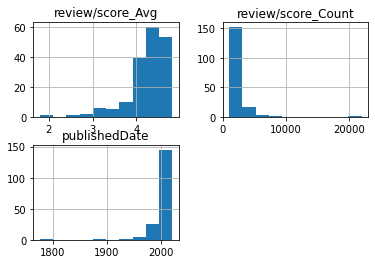

In [287]:
# Distribution of books that have more than 1000 reviews
books_1000_reviews.hist()

In [288]:
# Summary statistics for books which have more than 1000 reviews.
books_1000_reviews['review/score_Avg'].describe()

count    177.000000
mean       4.240071
std        0.459073
min        1.802454
25%        4.076061
50%        4.366795
75%        4.556761
max        4.815789
Name: review/score_Avg, dtype: float64

In [289]:
# Only 177 out of the 135796 books (which is 0.13%) have received more than 1000 reviews.
# I expected the books with 1000 or more reviews would be rated higher. 
# However, the Mean as well as the 50th percentile of ratings are lower for books with more than 1000 reviews
# when compared to books with less than 1000 reviews.
177/135796

0.0013034257268255325

# Authors

In [290]:
authors = books['authors'].unique()
authors = pd.DataFrame(authors)

In [291]:
# Total number of authors

authors.count()

0    97285
dtype: int64

In [292]:
# Average score by author

author_avg_score = books.groupby('authors')['review/score_Avg'].mean()
author_avg_score

authors
["'Annah Sobelman"]                                                                   4.000000
["'Jig rten mgon po (('Bri gung chos rje ;)", 'Khenpo Rinpochay Könchok Gyaltsen']    5.000000
["A'isha Ajayi"]                                                                      1.000000
["Aaron Ben-Ze'ev", 'Ruhama Goussinsky']                                              3.965517
["Adam I. O'Hirsi"]                                                                   5.000000
                                                                                        ...   
['鳥山明']                                                                               4.500000
['黄檗', 'Po Huang', 'Xiu Pei']                                                         5.000000
['黒田領治', 'Ryōji Kuroda', 'Takeshi Murayama', '村山武']                                   5.000000
['생명의말씀사편집부']                                                                         4.666667
['알렉상드르 뒤마(Alexandre Dumas)']             

<AxesSubplot:>

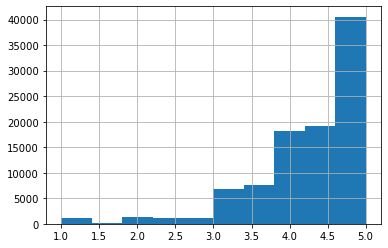

In [293]:
# Distribution of average scroe by author

author_avg_score.hist()

In [ ]:
# most authors have between 4 to 5 average rating.

In [ ]:
# Authors with the highest number of reviews

In [295]:
author_tot_reviews = books.groupby('authors')['review/score_Count'].count()
author_tot_reviews = author_tot_reviews.sort_values(ascending = False)
author_tot_reviews.head(10)

authors
['Agatha Christie']         112
["Louis L'Amour"]           110
['William Shakespeare']     106
['Ann M. Martin']            65
['Carolyn Keene']            62
['Edgar Rice Burroughs']     59
['Various']                  58
['DK']                       55
['Nora Roberts']             52
['Mark Twain']               51
Name: review/score_Count, dtype: int64

In [90]:
author_tot_reviews.describe()

count    127278.000000
mean          1.422005
std           2.154489
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         236.000000
Name: review/score_Count, dtype: float64

In [312]:
print(author_tot_reviews.quantile(0.05))
print(author_tot_reviews.quantile(0.80))

1.0
1.0


In [301]:
# The highest number of reviews for a single author is 236. But most authors received only 1 review.

# Books Categories

In [54]:
# categories
categories = books.categories.value_counts()

In [313]:
categories.reset_index().head()

,index,categories
0,Other,41199
1,['Fiction'],23419
2,['Religion'],9459
3,['History'],9330
4,['Juvenile Fiction'],6643


In [314]:
# number of categories

categories.count()

10884

In [317]:
# investigating if there are duplicate values with slightly different wording
categories[categories.index.str.contains('myster')]

['Detective and mystery stories']                                                235
['Detective and mystery stories, American']                                       45
['Detective and mystery stories, English']                                        27
['Detective and mystery comic books, strips, etc']                                 7
['Detective and mystery stories, American.']                                       2
['Detective and mystery stories, English.']                                        2
['Detective and mystery stories, Canadian (Czech) Translations into English']      2
['Detective and mystery plays, American']                                          1
['Detective and mystery plays']                                                    1
['Detective and mystery television programs']                                      1
['Detective and mystery stories, New Zealand']                                     1
['Detective and mystery radio programs']                         

In [318]:
# May be use text-processing on this column since the categories don't seem to be standardized.
# For example,'Detective and mystery stories, American' and  'Detective and mystery stories, American.'

# review/score_Avg and review/score_Count

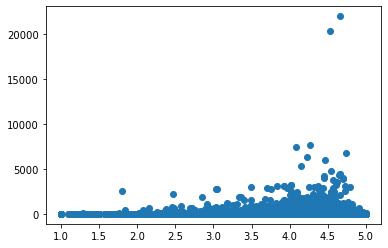

In [320]:
fig, ax = plt.subplots()
ax.plot(books['review/score_Avg'], books['review/score_Count'], marker='o', linestyle='None')

In [321]:
score_count = books[['review/score_Avg', 'review/score_Count']]

In [322]:
score_count.corr()

,review/score_Avg,review/score_Count
review/score_Avg,1.000000,-0.008316
review/score_Count,-0.008316,1.000000


In [ ]:
# there seems to be a very week negative correlation between average rating score and total number of reviews.

# ratings table - data cleaning

In [324]:
# Handling missing values


In [329]:
ratings.isna().sum()

Unnamed: 0                 0
Id                         0
Title                    208
User_id               561787
review/helpfulness         0
review/score               0
review/summary            38
review/text                8
dtype: int64

In [330]:
ratings = ratings.dropna(axis=0)

In [331]:
ratings.isna().sum()

Unnamed: 0            0
Id                    0
Title                 0
User_id               0
review/helpfulness    0
review/score          0
review/summary        0
review/text           0
dtype: int64

In [332]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2437988 entries, 0 to 2999998
Data columns (total 8 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   Id                  object 
 2   Title               object 
 3   User_id             object 
 4   review/helpfulness  object 
 5   review/score        float64
 6   review/summary      object 
 7   review/text         object 
dtypes: float64(1), int64(1), object(6)
memory usage: 167.4+ MB


In [333]:
ratings = ratings.reset_index(drop=True)

In [334]:
ratings.head(3)

,Unnamed: 0,Id,Title,User_id,review/helpfulness,review/score,review/summary,review/text
0,0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,7/7,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,10/10,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,10/11,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."


In [336]:
ratings = ratings.drop(columns=['Unnamed: 0'], axis=1)

# ratings by user

In [337]:
user_avg_ratings = ratings.groupby('User_id')['review/score'].mean()

In [338]:
user_avg_ratings

User_id
A00109803PZJ91RLT7DPN    5.000000
A00117421L76WVWG4UX95    5.000000
A0015610VMNR0JC9XVL1     4.666667
A002258237PFYJV336T05    5.000000
A00264602WCXBHHFPLTQ4    5.000000
                           ...   
AZZZELE3I0CKD            5.000000
AZZZJY3RMN57G            5.000000
AZZZT14MS21I6            5.000000
AZZZYCR4NZADZ            5.000000
AZZZZW74AAX75            5.000000
Name: review/score, Length: 1008949, dtype: float64

In [339]:
user_tot_ratings = ratings.groupby('User_id')['review/score'].count()

In [340]:
user_tot_ratings

User_id
A00109803PZJ91RLT7DPN    1
A00117421L76WVWG4UX95    1
A0015610VMNR0JC9XVL1     6
A002258237PFYJV336T05    1
A00264602WCXBHHFPLTQ4    1
                        ..
AZZZELE3I0CKD            1
AZZZJY3RMN57G            1
AZZZT14MS21I6            5
AZZZYCR4NZADZ            2
AZZZZW74AAX75            1
Name: review/score, Length: 1008949, dtype: int64

In [341]:
user_tot_ratings.describe()

count    1.008949e+06
mean     2.416364e+00
std      1.213259e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.795000e+03
Name: review/score, dtype: float64

In [342]:
#maximum number of ratings from one user
user_tot_ratings.max()

5795

In [354]:
# users who rated more than 10 books. 

user_10_rating = user_tot_ratings[user_tot_ratings > 10]
user_10_rating

User_id
A00891092QIVH4W1YP46A    19
A01038432MVI9JXYTTK5T    24
A01254073JW8SSTKH6AIB    19
A0134066213WYQXLTVGYT    12
A035042126FPCW9EUHU1U    15
                         ..
AZYZ6338V6TLU            13
AZZ1E6SG4RAT7            19
AZZCSTUZ5EO4I            12
AZZUIE66HZNY1            13
AZZVZL4QEHEHO            25
Name: review/score, Length: 26057, dtype: int64

In [344]:
# Out of the total 1,008,949, 26,057  users (which is 2.6%) have given more than 10 reviews. 
# The highest number of ratings by a single user is 5,795.

26057/1008949

0.025825884162628637

In [348]:
# ratings

ratings.describe()

,review/score
count,2.437988e+06
mean,4.228280e+00
std,1.178650e+00
min,1.000000e+00
25%,4.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


<AxesSubplot:>

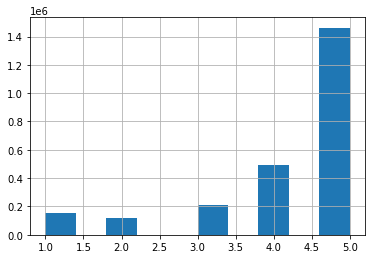

In [349]:
# Distribution of ratings
# This distribution has long left tail. Most people seem to rate 4 or 5.

ratings['review/score'].hist()

In [356]:
# what is the average rating given by people who rate a lot, let's say more than 10 reviews.
ten_rating = ratings[ratings['User_id'].isin(user_10_rating.index)]



In [359]:
ten_rating['review/score'].mean()

4.25443960365501

In [361]:
ratings['review/score'].mean()

4.2282800407549175

In [ ]:
# People who rated more than 10 books gave a little higher average rating that the total user population in the data.

In [362]:
books.to_csv('books_after_eda.csv')

In [363]:
ratings.to_csv('ratings_after_eda.csv')